In [1]:
import os
import itk
import sys
from ipywidgets import interact, fixed
from ipywidgets import interactive
import ipywidgets as widgets
from itkwidgets import view
import numpy as np
from matplotlib import pyplot as plt

In [2]:
FileName='CU102973_TLC.img.gz'
Image=itk.imread(FileName,itk.F)

In [3]:
Image.GetDirection()

<itkMatrixPython.itkMatrixD33; proxy of <Swig Object of type 'itkMatrixD33 *' at 0x7fdb3323e570> >

In [4]:
def get_direction_matrix(Image):
    Dimension=Image.GetImageDimension()
    DC=np.zeros((Dimension,Dimension))
    for i in range(Dimension):
        for j in range(Dimension):
            DC[i,j]=Image.GetDirection().GetVnlMatrix().get(i,j)
    return DC

In [3]:
def flip_image(image):
    PixelType=itk.F
    ImageType=itk.Image[PixelType,3]
    flipAxes=(False,False,True)
        
    flipfilter=itk.FlipImageFilter[ImageType].New()
    flipfilter.SetInput(image)
    flipfilter.SetFlipAxes(flipAxes)
    flipfilter.Update()
    return flipfilter.GetOutput()

In [5]:
flipped=flip_image(Image)

In [7]:
view(flipped,cmap='Grayscale')

Viewer(cmap='Grayscale', gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Obje…

In [8]:
def flatten_image(input_image):
    """Flattens image into a 1D array.
    
    Args:
      input_image (itk.Image): Input image
    Returns:
      np_image_as_array (np.array): 1D array representing a image
      
    """
    feat_img = itk.GetArrayFromImage(input_image)
    np_image_as_array = feat_img.flatten()  
   
    return np_image_as_array

In [9]:
value=flatten_image(Image)

(array([3.2793936e+07, 0.0000000e+00, 0.0000000e+00, 2.8730130e+06,
        4.3050184e+07, 4.6399506e+07, 2.7368341e+07, 1.3264900e+06,
        3.2844800e+05, 7.5400000e+02]),
 array([-3024. , -2519.3, -2014.6, -1509.9, -1005.2,  -500.5,     4.2,
          508.9,  1013.6,  1518.3,  2023. ], dtype=float32),
 <a list of 10 Patch objects>)

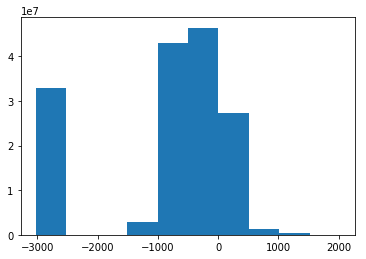

In [57]:
plt.hist(value)

In [ ]:
Dimension = 3

FloatPixelType = itk.ctype('float')
FloatImageType = itk.Image[FloatPixelType, Dimension]

gradientMagnitude = itk.GradientMagnitudeImageFilter.New(Input=flipped)

watershed = itk.WatershedImageFilter.New(Input=gradientMagnitude.GetOutput())

threshold = float(0.005)
level = float(0.5)
watershed.SetThreshold(threshold)
watershed.SetLevel(level)

LabeledImageType = type(watershed.GetOutput())

PixelType = itk.ctype('unsigned char')
RGBPixelType = itk.RGBPixel[PixelType]
RGBImageType = itk.Image[RGBPixelType, Dimension]

ScalarToRGBColormapFilterType = itk.ScalarToRGBColormapImageFilter[LabeledImageType, RGBImageType]
colormapImageFilter = ScalarToRGBColormapFilterType.New()
colormapImageFilter.SetColormap(ScalarToRGBColormapFilterType.Jet)
colormapImageFilter.SetInput(watershed.GetOutput())
colormap=colormapImageFilter.Update()
